## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Shape Check
print(df.shape)

(284807, 31)


In [6]:
#observe the different feature type present in the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Insights:
    - There are a total of 31 columns with 284807 entries in the dataset.
    - All the fields available to us are numeric in nature.

In [7]:
#Describe the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Insights:
    - There is a possibility of outliers in the dataset. We will explore more on this in visualisation phase.

In [8]:
#Missing data check

#Define a function to check missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/data.isnull().count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [9]:
missing_data(df)

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


Insights - There is no missing data in our dataset.

Here we will observe the distribution of our classes

In [10]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [11]:
#Print Fraud vs Non-Fraud Transactions data
print('Number of Non-Fraudlent Transactions: {} and contributes to {} percent of transactions'.format(classes[0],normal_share))
print('Number of Fraudlent Transactions: {} and contributes to {} percent of transactions'.format(classes[1],fraud_share))

Number of Non-Fraudlent Transactions: 284315 and contributes to 99.82725143693798 percent of transactions
Number of Fraudlent Transactions: 492 and contributes to 0.1727485630620034 percent of transactions


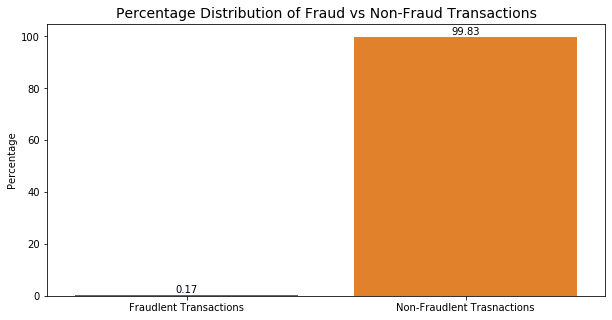

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))
ax = sns.barplot(['Fraudlent Transactions', 'Non-Fraudlent Trasnactions'], [fraud_share, normal_share])
plt.title('Percentage Distribution of Fraud vs Non-Fraud Transactions', fontsize=14)
plt.ylabel('Percentage')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 1,'{}'.format(round(height,2)), ha="center") 
plt.show()

Insights: We see an imbalance in our dataset. Only 0.17% transactions of the dataset belongs to fraud transactions.

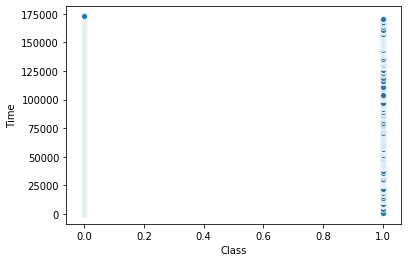

In [13]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y=df['Time'], x = df['Class'])
plt.show()

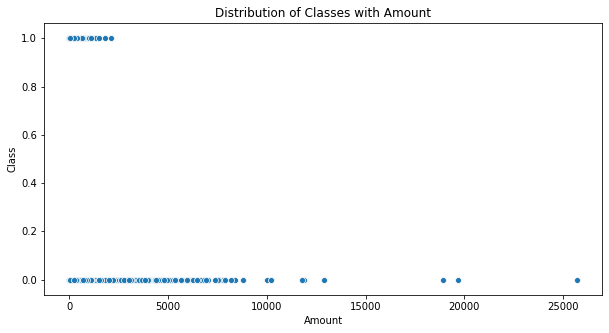

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Amount'], y = df['Class'])
plt.title('Distribution of Classes with Amount')
plt.show()

Insights - We see that Transaction Amount of fraud transctions is very less - even lesser than 5000.

In [15]:
print("Out of {} as total amount of transactions, a sum amount of {} were fraudly transacted."
      .format(df[df['Class']==0]['Amount'].sum(),df[df['Class']==1]['Amount'].sum()))

Out of 25102462.04 as total amount of transactions, a sum amount of 60127.97 were fraudly transacted.


In [16]:
#Lets also see amount transacted in fraudlent transactions
sorted(df[df['Class']==1]['Amount'].drop_duplicates())

[0.0,
 0.01,
 0.2,
 0.38,
 0.68,
 0.69,
 0.76,
 0.77,
 0.83,
 0.92,
 1.0,
 1.1,
 1.18,
 1.52,
 1.59,
 1.63,
 1.75,
 1.79,
 2.0,
 2.22,
 2.27,
 2.28,
 2.47,
 3.12,
 3.14,
 3.22,
 3.76,
 3.79,
 3.9,
 3.93,
 4.49,
 4.56,
 4.69,
 4.87,
 4.9,
 4.97,
 5.0,
 5.09,
 5.3,
 5.91,
 6.27,
 6.62,
 6.74,
 6.99,
 7.06,
 7.18,
 7.52,
 7.53,
 7.57,
 7.58,
 7.59,
 7.61,
 8.0,
 8.3,
 8.54,
 8.64,
 8.9,
 9.13,
 9.21,
 9.29,
 9.82,
 9.99,
 10.7,
 11.0,
 11.38,
 11.39,
 11.4,
 12.31,
 14.46,
 16.48,
 17.06,
 17.39,
 18.0,
 18.96,
 18.98,
 19.02,
 19.04,
 19.59,
 19.73,
 19.95,
 22.04,
 22.47,
 23.36,
 24.9,
 25.0,
 29.95,
 30.14,
 30.26,
 30.3,
 30.31,
 30.39,
 31.91,
 33.59,
 33.76,
 34.12,
 35.0,
 37.32,
 37.93,
 38.76,
 39.45,
 39.9,
 39.98,
 40.0,
 42.53,
 44.9,
 45.03,
 45.48,
 45.49,
 45.51,
 45.64,
 50.0,
 51.37,
 52.69,
 53.95,
 57.73,
 59.0,
 59.68,
 60.0,
 60.6,
 65.0,
 67.9,
 75.86,
 76.94,
 77.89,
 78.0,
 80.22,
 80.9,
 83.38,
 84.28,
 88.0,
 88.23,
 93.35,
 94.82,
 97.0,
 98.01,
 99.85,
 99.9,


In [5]:
# Drop unnecessary columns
#Here we see that the field - 'Time' contains the data which shows seconds elapsed between the first transaction and 
    #the subsequent transactions which doesn't make any sense in our analysis. 
#Dropping column - Time
df.drop('Time', axis=1, inplace=True)
df.shape

(284807, 30)

## Correlation Matrix

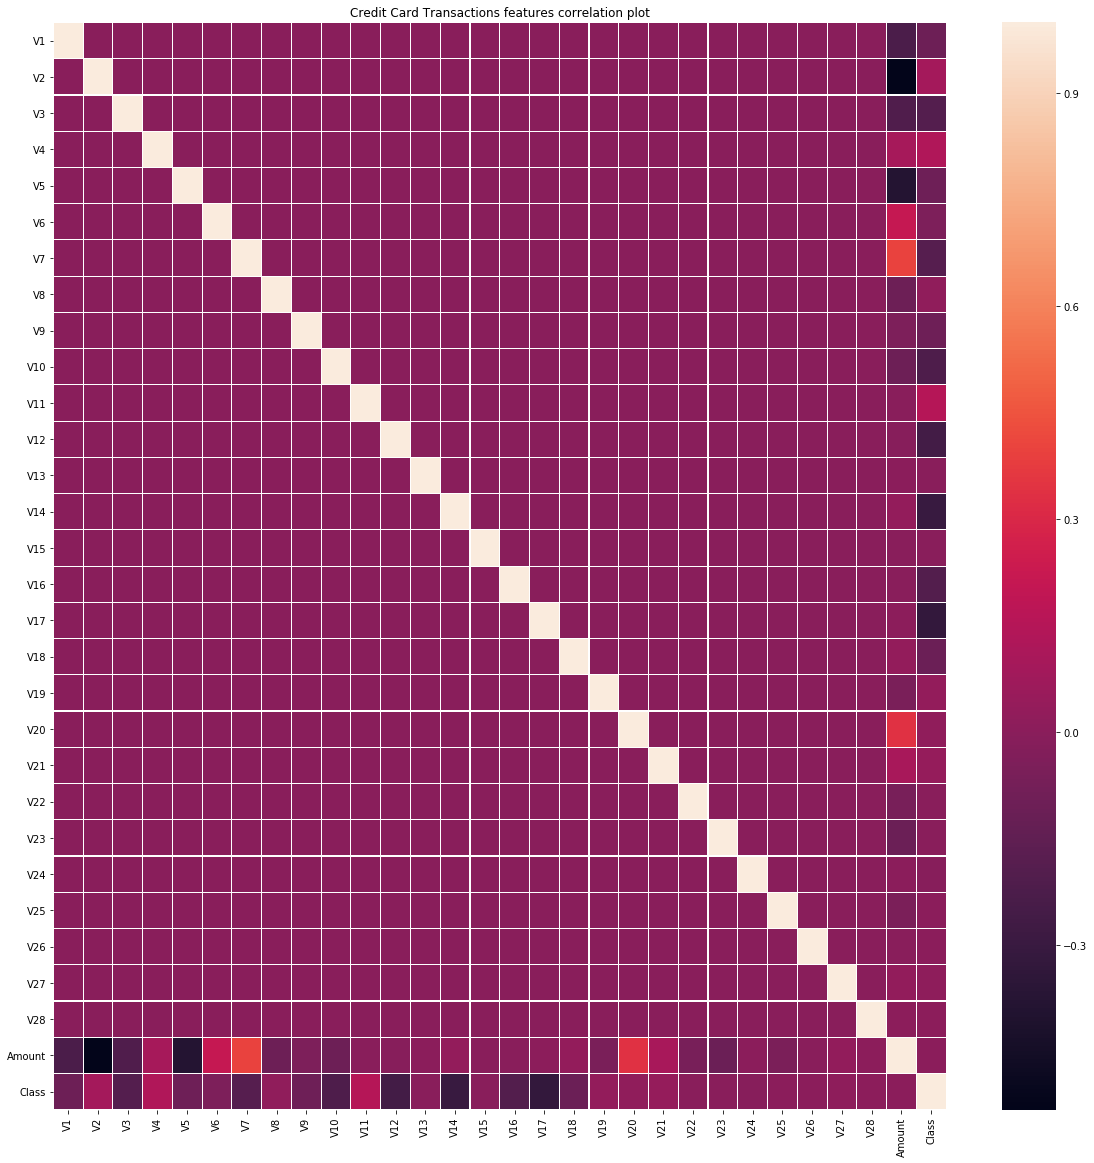

In [18]:
plt.figure(figsize = (20,20))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

There is no notable correlation between features V1-V28. There are certain correlations between some of these features and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

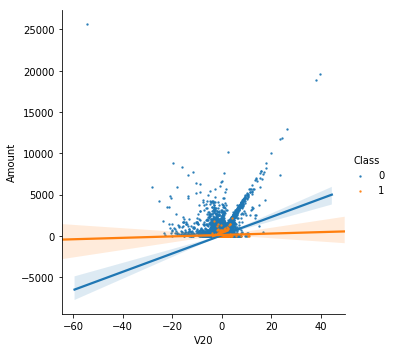

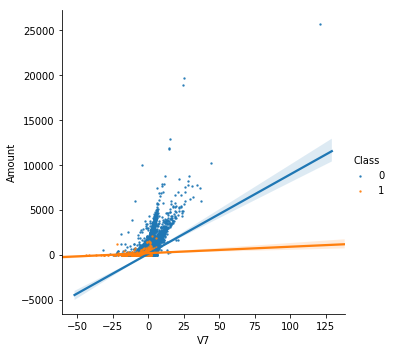

In [19]:
plot1 = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plot1 = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

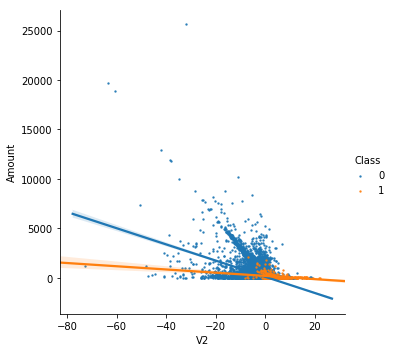

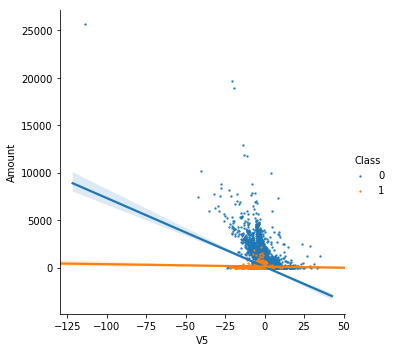

In [20]:
plot2 = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plot2 = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

In [18]:
df1 = df.copy()  #Taking backup

### Splitting the data into train & test data

In [6]:
y= df['Class']#class variable
X = df.drop('Class', axis=1)

In [7]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, train_size=0.7, stratify=y, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [8]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))  #350, 142

492
344
148


### Plotting the distribution of a variable

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
def plot_hist(cols):
    plt.figure(figsize=(20,20))
    for i in range(1,len(cols)+1):
        plt.subplot(6,5,i)
        sns.distplot(X_train[cols[i-1]], kde_kws={"label": "Skew: " + str(round(X_train[cols[i-1]].skew(),2))})
        plt.xlabel(cols[i-1],labelpad=1)
    plt.show()

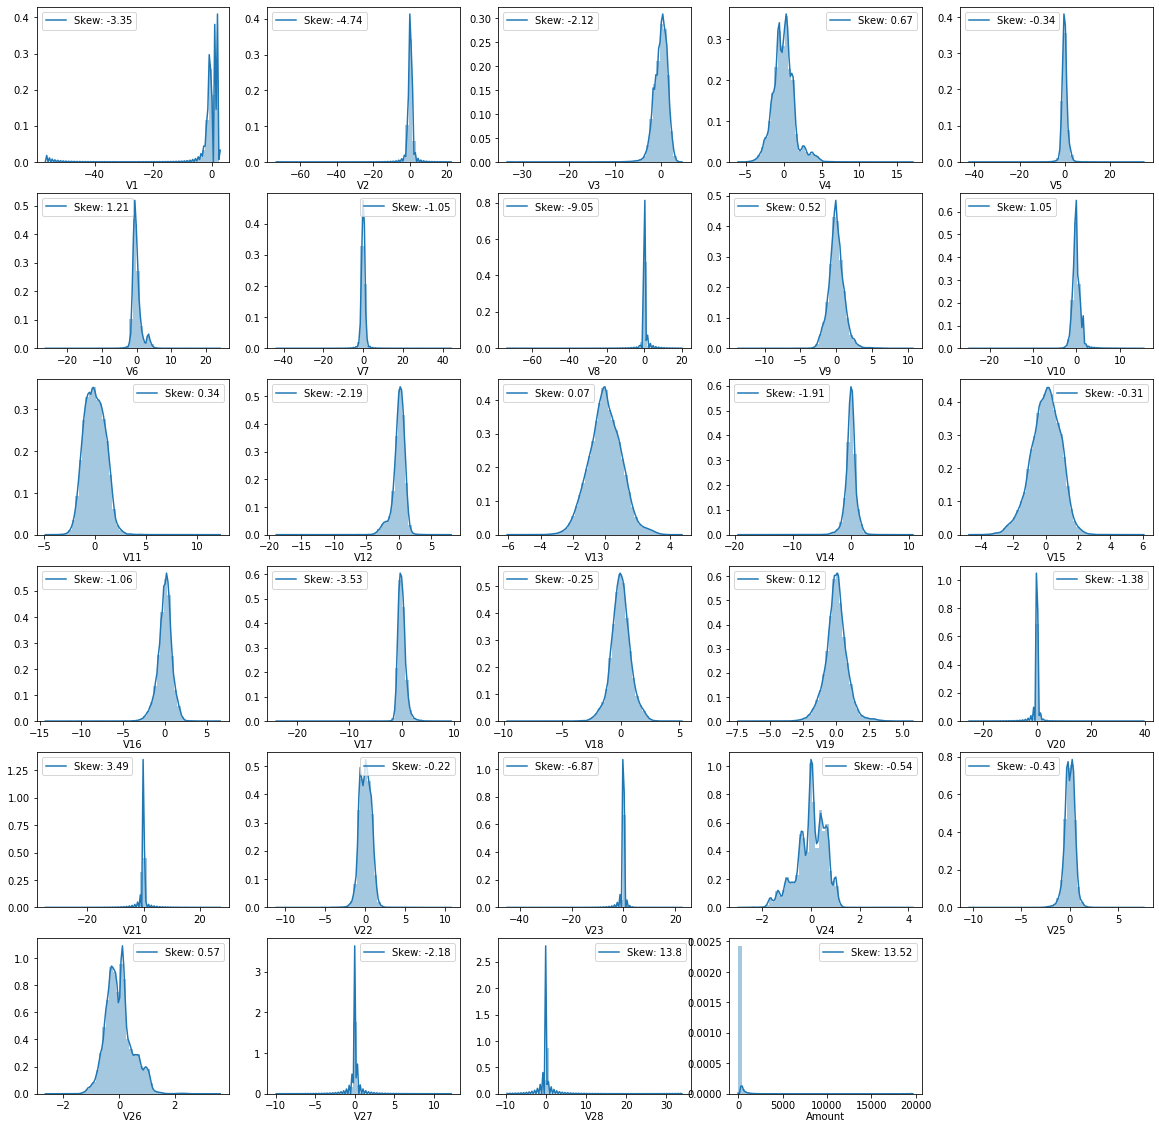

In [23]:
cols = X_train.columns.to_list()
plot_hist(cols)

Insights - We see most of the features as skewed. Lets apply Power transformation on them to make the features more gaussian.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
X_train_bkp = X_train.copy()

In [9]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method='yeo-johnson', copy = False)
power_transform.fit_transform(X_train)
power_transform.transform(X_test)

array([[-0.55395099,  0.91160093, -0.11928654, ..., -0.12977515,
         0.17955064,  0.90076267],
       [ 0.02609086,  1.26869257, -1.43424809, ...,  0.29394533,
        -0.17958052, -0.43072205],
       [ 1.44914779, -0.05637223, -0.93523866, ..., -0.05895154,
        -0.15948888, -0.40288819],
       ...,
       [ 0.40730679, -0.2662729 ,  0.14250171, ...,  0.07984482,
        -0.00433223,  0.40504099],
       [-1.78794338, -1.85749671,  1.25787403, ...,  2.06920383,
         0.27978279,  0.7051672 ],
       [-2.52591184,  4.32254435, -3.31579382, ..., -3.14361737,
         0.7478174 ,  0.81119126]])

In [24]:
#Print sample records from train dataset 
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,0.138158,-0.890268,-0.409325,-1.226484,0.537195,0.196855,-0.202927,-0.227023,-0.958282,0.112696,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
163811,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,-0.804936,-0.499228,0.333235,1.038266,-1.262011,-0.431847,0.271120,0.331350,-0.415298,-0.268385,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
196038,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,0.022332,-0.435623,0.950682,1.146565,0.562429,0.263245,-0.803975,-0.465875,-0.779956,0.165445,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
25173,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,0.517523,1.543419,-0.452579,-0.088502,0.060799,0.756345,0.661142,0.798885,-1.402005,2.043648,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
253792,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,-0.785152,-0.869431,-0.408620,-0.064706,-0.836984,-0.242246,-0.693513,1.832273,0.444827,0.723653,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


In [25]:
#Print sample records from test dataset 
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262922,-0.553951,0.911601,-0.119287,2.639696,1.288459,0.169955,1.499854,-0.361266,-3.002384,1.269936,-1.952086,-1.606369,-0.852876,1.194911,0.363265,-0.927355,0.360991,0.233021,2.057536,0.593378,0.443245,0.966621,-0.861067,-1.118134,2.556340,1.833753,-0.129775,0.179551,0.900763
123418,0.026091,1.268693,-1.434248,1.079574,0.578359,-1.185080,0.388745,0.268395,-0.592212,-1.186629,1.763168,-0.384333,-0.685838,-2.657593,0.427665,1.624976,3.525397,2.766684,0.010411,-0.016125,-0.088478,-0.253061,0.165137,-0.671224,-0.853108,-0.814560,0.293945,-0.179581,-0.430722
206135,1.449148,-0.056372,-0.935239,0.332960,0.022460,-1.120224,0.265343,-0.503796,0.458034,0.027150,-0.487085,0.879108,1.010655,0.262488,0.677197,-0.380451,-0.685604,-0.236219,-0.290584,-0.223743,0.370299,1.325718,-0.041734,0.093804,0.544512,-0.156863,-0.058952,-0.159489,-0.402888
273483,-0.529268,0.462909,1.303447,-0.408856,0.358472,0.430503,0.412746,-0.025864,0.544429,-0.485552,-1.585592,-1.051249,-0.916006,-0.149611,1.831926,-0.030942,-0.821485,0.770444,1.238273,0.276420,-0.370857,-0.762667,-0.601157,-0.169099,0.821290,-1.498660,0.446620,-0.244684,-1.538594
245758,1.009469,-0.648891,-0.884119,0.522445,-0.284544,-0.285231,0.045768,-0.219652,0.797417,0.047236,-1.024736,-0.299100,-0.641120,0.265266,0.412477,0.138021,-0.521883,-0.267115,-0.201108,0.279405,0.127582,-0.271766,0.095061,1.322893,-0.573686,0.444967,-0.252729,-0.016614,1.349047


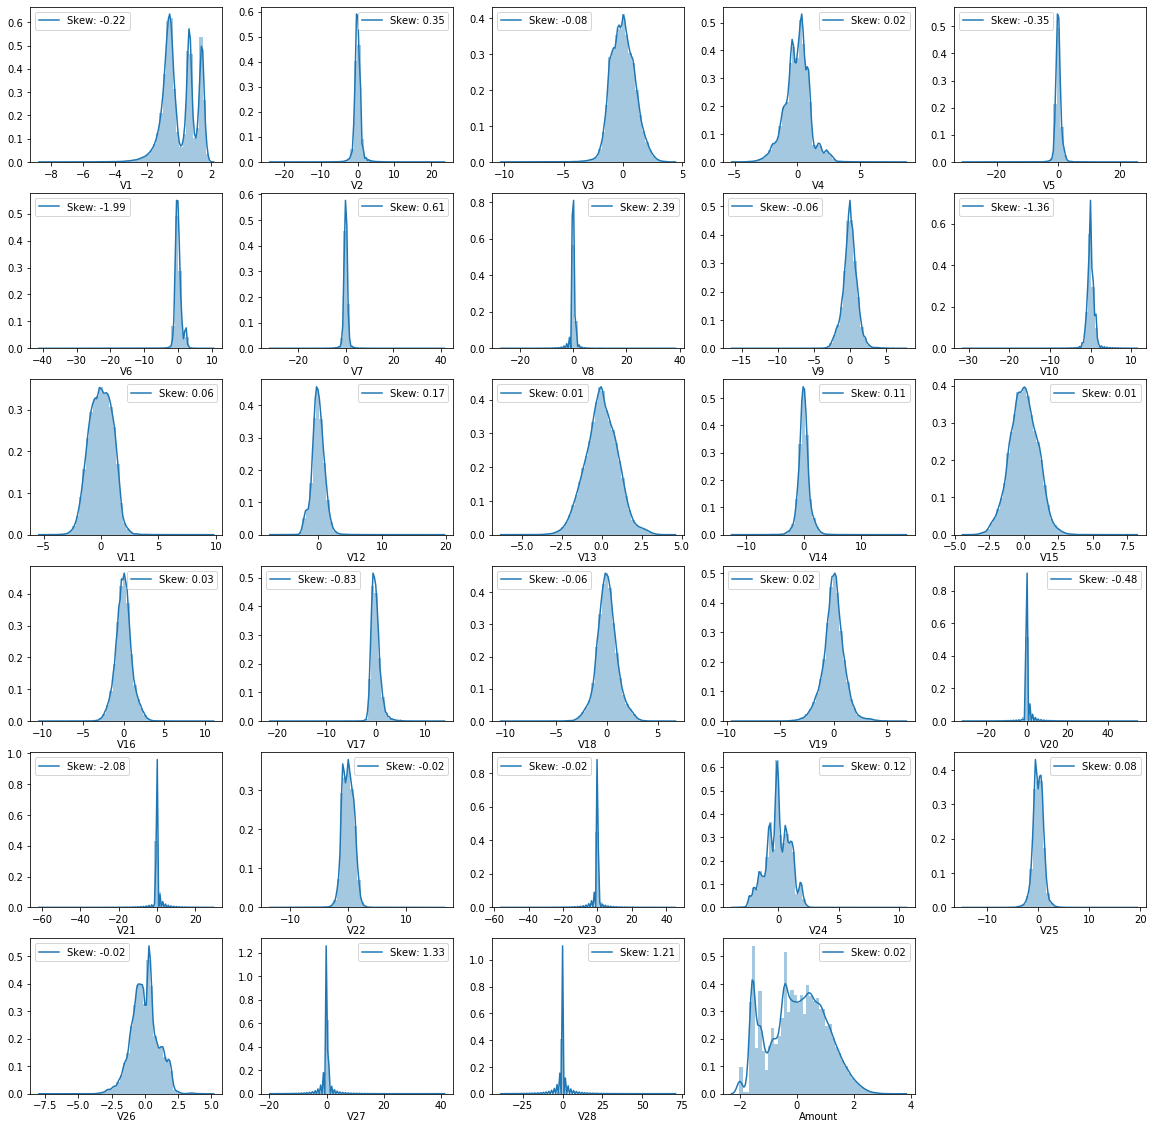

In [28]:
# plot the histogram of a variable from the dataset again to see the result 
cols = X_train.columns.to_list()
plot_hist(cols)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [10]:
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  accuracy_score,mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

In [28]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [29]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


# Experimentation Approach:
    We are conducting below experiments to compare our results.
    1. On Imbalanced Data:
        -- Create and compare results of different machine learning algorithms with default parameters.
        
    2. On Imbalanced Dataset and Tuned Hyper Parameters:Steps used to create and compare different machine learning algorithsm:
        A. Perform Cross validation
        B. Apply Hyper Parameter Tuning 
        C. Create Final Model with tuned hyper parameters
        D. Evaluate the model
        
    3. On Balanced Dataset: Perform Oversampling or Undersampling techniques to balance the imbalance of dataset.
       Below are the appoaches, we have chosen for this:
       
       -- Random Oversampling: Steps used to create and compare different machine learning algorithsm:
          A. Perform Cross validation
          B. Apply Hyper Parameter Tuning 
          C. Create Final Model with tuned hyper parameters
          D. Evaluate the model
            
       -- SMOTE: Steps used to create and compare different machine learning algorithsm:
          A. Perform Cross validation
          B. Apply Hyper Parameter Tuning 
          C. Create Final Model with tuned hyper parameters
          D. Evaluate the model
            
       -- ADASYN: Steps used to create and compare different machine learning algorithsm:
          A. Perform Cross validation
          B. Apply Hyper Parameter Tuning 
          C. Create Final Model with tuned hyper parameters
          D. Evaluate the model
            
            
    Different Models we are using for our experiments:
        a. Logistic Regression
        b. Decision Tree
        c. Random Forest
        d. SVM
        e. KNN
        f. XGBOOST

Evaluation Metric: *****ROC_AUC*****

Cross Validation Strategy: ****Stratified K-Fold****

Dataset Split Strategy: **** stratfied train_test_split****

In [12]:
#Create a function to evaluate the algorithm with default threshold.

def evaluate_model(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    #Lets Calculate Accuracy, Sensitivity and Specificity
    TP = cnf_matrix[1,1] # true positive 
    TN = cnf_matrix[0,0] # true negatives
    FP = cnf_matrix[0,1] # false positives
    FN = cnf_matrix[1,0] # false negatives
    #Lets calculate Metrics
    print('Accuracy Score : ',accuracy_score(y_test, y_pred))
    
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity: ', TP / float(TP+FN))
    
    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))
    
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('false postive rate: ',FP/ float(TN+FP))
    
    # positive predictive value 
    print('positive predictive value: ', TP / float(TP+FP))
    
    # Negative predictive value
    print('Negative predictive value: ',TN / float(TN+ FN))
    
    #--------------------------------------------------------------------------------------------------------------
    #Recall Score
    print('Recall Score : ',recall_score(y_test, y_pred))
    
    #ROC AUC Score
    print('ROC AUC Score : ',roc_auc_score(y_test, y_pred))
        

In [13]:
#Create a function to evaluate the algorithm with non-default threshold.
def evaluate_model_nondefault_prob(y_pred,y_test):
    y_pred_df = pd.DataFrame(y_pred)
    # Converting to column dataframe
    y_pred_1 = y_pred_df.iloc[:,[1]]
    
    # Removing index for both dataframes to append them side by side 
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_2 = y_test.reset_index(drop=True)
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_2,y_pred_1],axis=1)
    
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 1 : 'Class_prob'})
    
    #print the evaluation score on the X_test by choosing the best evaluation metric
    fpr, tpr, thresholds =roc_curve(y_pred_final.Class,y_pred_final.Class_prob)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC Score: ',roc_auc)
    

# Test 1 - Experimentation with Different Models on Imbalanced Dataset and Default Parameters

# 1. a. Logistic Regression

In [32]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
#num_C = ______  #--> list of values
cv_num = 5  #--> list of values

In [34]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Confusion Metrics
y_pred=lr.predict(X_test)
evaluate_model(y_test,y_pred)

Accuracy Score :  0.999133925541004
Sensitivity:  0.6216216216216216
Specificity:  0.9997889677003341
false postive rate:  0.00021103229966586552
positive predictive value:  0.8363636363636363
Negative predictive value:  0.9993437474365134
Recall Score :  0.6216216216216216
ROC AUC Score :  0.8107052946609778


# 1. b. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)
# Making predictions
y_pred_default = dt_default.predict(X_test)

#Model Evaluation
evaluate_model(y_test,y_pred_default)

Accuracy Score :  0.9990519995786665
Sensitivity:  0.7364864864864865
Specificity:  0.9995075913007796
false postive rate:  0.0004924086992203529
positive predictive value:  0.7218543046357616
Negative predictive value:  0.999542747268208
Recall Score :  0.7364864864864865
ROC AUC Score :  0.867997038893633


# 1.c. Random Forest

In [79]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=42)

# fit
rfc.fit(X_train,y_train)

# Making predictions
y_pred_default = rfc.predict(X_test)

#Model Evaluation
evaluate_model(y_test,y_pred_default)

Accuracy Score :  0.9994733330992591
Sensitivity:  0.7635135135135135
Specificity:  0.9998827598335189
false postive rate:  0.0001172401664810364
positive predictive value:  0.9186991869918699
Negative predictive value:  0.9995897796530708
Recall Score :  0.7635135135135135
ROC AUC Score :  0.8816981366735163


# 1.d. SVM

In [80]:
# Model building

# instantiate an object of class SVC()
# we are using cost C=1
svc = SVC(C = 1)

# Model fit
svc.fit(X_train, y_train)

# Model Prediction
y_pred = svc.predict(X_test)

#Model Evaluation
evaluate_model(y_test,y_pred)

Accuracy Score :  0.9994148145547324
Sensitivity:  0.7027027027027027
Specificity:  0.9999296559001114
false postive rate:  7.034409988862185e-05
positive predictive value:  0.9454545454545454
Negative predictive value:  0.9994843729858319
Recall Score :  0.7027027027027027
ROC AUC Score :  0.8513161793014071


# 1.e. KNN

In [81]:
#Import KNN Library
from sklearn.neighbors import KNeighborsClassifier
# Model Building
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#Model Fit
knn.fit(X_train, y_train)
#Model Prediction
y_pred = knn.predict(X_test)
#Model Evaluation
evaluate_model(y_test,y_pred)

Accuracy Score :  0.9994148145547324
Sensitivity:  0.75
Specificity:  0.9998475877835746
false postive rate:  0.00015241221642534733
positive predictive value:  0.8951612903225806
Negative predictive value:  0.9995663334075645
Recall Score :  0.75
ROC AUC Score :  0.8749237938917873


# 1.f: XGBoost

In [249]:
#Instantiate XGBoost Classifier
xgb = XGBClassifier()

#Model Fit
xgb.fit(X_train, y_train)

#Model Prediction
y_pred = xgb.predict(X_test)
#Model Evaluation
evaluate_model(y_test,y_pred)

Accuracy Score :  0.9994382219725431
Sensitivity:  0.7635135135135135
Specificity:  0.9998475877835746
false postive rate:  0.00015241221642534733
positive predictive value:  0.8968253968253969
Negative predictive value:  0.9995897652285007
Recall Score :  0.7635135135135135
ROC AUC Score :  0.8816805506485441


# Results Summarization of Models on Imbalanced Dataset with Default Parameters:

**Evaluation Metric: ROC_AUC**

    1. Logistic Regression: 0.81
    2. Decision Tree      : 0.87
    3. Random Forest      : 0.88
    4. SVM                : 0.85
    5. KNN                : 0.87
    6. XGBoost            : 0.88

***Insights:*** 
- We see that Random Forest and XGBoost has provided us maximum ROC_AUC Score of 0.88 on imbalanced dataset with default parameters.
- We also observed that with all of the models we have got an Accuracy of 0.99 but still the model is not able to predict fraudlent transaction correctly which hence proves the fact why we don't consider Accuracy as an evaluation metric in case of imbalanced dataset's claasification problems.

# 2. Experimentations with different ML Models on Imbalanced Dataset and Tuned Hyper Parameters

In [33]:
#perform cross validation
# Stratified KFold cross validation
cv_num=5
kfolds = StratifiedKFold(n_splits = cv_num, random_state = 100, shuffle = True)

# 2.a Logistic Regression

In [36]:
# Perform Cross - validation
lrc = LogisticRegression()
scores = cross_val_score(lrc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
print(scores)

[0.99873329 0.97491731 0.95294698 0.97869706 0.98620224]


In [37]:
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Logistic Regression ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

Logistic Regression ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9782993766643251


In [38]:
#Perform Hyper Parameter Tuning

params = [{"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
lr_tuning = LogisticRegression()
#Perform GridSearch Stratified Cross Validation
lr_cv_tuning = GridSearchCV(lr_tuning, params, cv = kfolds, scoring = 'roc_auc', return_train_score=True) 
# Model Fit
lr_cv_tuning.fit(X_train, y_train)  
# get the best parameter
best_param = lr_cv_tuning.best_estimator_
print('{} algorithm best parameter are : {}'.format('Logistic Regression',best_param))

C:\Users\vasudes2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\vasudes2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\vasudes2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

Logistic Regression algorithm best parameter are : LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
#Creating Final Logistic Regression Model with Tuned HyperParameters

#Model Creation
lr_final_imbal = LogisticRegression(C=0.01, penalty = 'l2')

#Model Fit
lr_final_imbal.fit(X_train, y_train)
#Model Prediction
y_pred=lr_final_imbal.predict(X_test)

#Model Evaluation with default threshold
evaluate_model(y_test,y_pred)

Accuracy Score :  0.9990988144142879
Sensitivity:  0.581081081081081
Specificity:  0.9998241397502784
false postive rate:  0.0001758602497215546
positive predictive value:  0.8514851485148515
Negative predictive value:  0.9992735112840102
Recall Score :  0.581081081081081
ROC AUC Score :  0.7904526104156797


In [25]:
#Model Prediction with '.predict_proba' method
y_pred = lr_final_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9754983103157087


# 2.b Decision Tree

In [82]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.8790503261377168


In [87]:
#Perform Hyper Parameter Tuning 

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 15, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
ERROR! Session/line number was not unique in database. History logging moved to new session 258


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.5min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Criterion : Entropy

In [89]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.6min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best max_depth = 4

In [90]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 18.4min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best min_samples_leaf = 9

In [91]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 15.1min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best min_samples_split = 3

In [26]:
#Creating Final Decision Tree Model with Tuned HyperParameters

#Model Creation
dt_final_imbal = DecisionTreeClassifier(criterion='entropy',max_depth = 4, min_samples_leaf =9, min_samples_split=3)

#Model Fit
dt_final_imbal.fit(X_train, y_train)
y_pred=dt_final_imbal.predict(X_test)
print('Evaluation Results of Decision Tree on Imbalanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Decision Tree on Imbalanced Dataset:
Accuracy Score :  0.9993562960102056
Sensitivity:  0.7364864864864865
Specificity:  0.9998124157336303
false postive rate:  0.00018758426636965824
positive predictive value:  0.872
Negative predictive value:  0.9995428866124382
Recall Score :  0.7364864864864865
ROC AUC Score :  0.8681494511100584


In [28]:
#Model Prediction with '.predict_proba' method
y_pred = dt_final_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.927938331672431


# 2.c: Random Forest

In [83]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Random Forest ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9520454152242834


In [93]:
#Perform Hyper Parameter Tuning

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 36.0min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Best Criterio: Entropy

In [100]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 20, 5),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy')
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 60.8min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Best max_depth = 12

In [36]:
#n_estimators
# Create the parameter grid 
param_grid = {
    'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=12)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 10.2min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 16.8min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


n_estimators = 100

In [36]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 2)
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=12)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.3min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Best min_samples_leaf = 1

In [39]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2)
    'min_samples_split': range(1, 20, 5)
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=12,min_samples_leaf=1)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.4min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_Samples_split = 11

In [42]:
#max_features
# Create the parameter grid 
param_grid = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=12,min_samples_leaf=1,min_samples_split=11)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 26.4min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


max_features = 8

In [29]:
#Final Random Forest Model with Best Parameters

rfc_imbal = RandomForestClassifier(bootstrap=True, criterion= 'entropy',
                             max_depth=12,
                             min_samples_leaf=1,
                             min_samples_split=11,
                             max_features=8,
                             n_estimators=100)
#Model Fit
rfc_imbal.fit(X_train,y_train)

#Model Predict
y_pred=rfc_imbal.predict(X_test)
print('Evaluation Results of Random Forest on Imbalanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Random Forest on Imbalanced Dataset:
Accuracy Score :  0.9995084442259752
Sensitivity:  0.7837837837837838
Specificity:  0.9998827598335189
false postive rate:  0.0001172401664810364
positive predictive value:  0.9206349206349206
Negative predictive value:  0.999624928208915
Recall Score :  0.7837837837837838
ROC AUC Score :  0.8918332718086514


In [30]:
#Model Prediction with '.predict_proba' method
y_pred = rfc_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9632488121511511


# 2.d: SVM

In [115]:
svc = SVC(C = 1)
scores = cross_val_score(svc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('SVM ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9514037539270644


In [121]:
#HyperParameter Tuning with SVM
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10]}

svc_tuned = SVC()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = svc_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train, y_train) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('SVC',best_param))

#Model Results
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 32.5min finished


Random Forest algorithm best parameter are : SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,766.489200,429.794020,19.799686,1.485205,0.1,{'C': 0.1},0.977644,0.966130,0.947611,0.936885,0.957929,0.957240,0.014163,2,0.999060,0.999134,0.999155,0.999092,0.999560,0.999200,0.000183
1,344.789530,159.238712,13.603527,2.671795,1,{'C': 1},0.968429,0.956873,0.946862,0.929627,0.955228,0.951404,0.012878,3,0.999466,0.999612,0.999663,0.999282,0.999863,0.999577,0.000195
2,146.081988,14.985256,11.446402,2.732533,10,{'C': 10},0.971479,0.964647,0.955652,0.940575,0.958786,0.958228,0.010348,1,0.999928,0.999928,0.999951,0.999930,0.999942,0.999936,0.000010


In [36]:
#Creating Final SVC Model

svc_imbal = SVC(C = 10, probability=True)
#Model Fit
svc_imbal.fit(X_train,y_train)

#Model Predict
y_pred=svc_imbal.predict(X_test)
print('Evaluation Results of Random Forest on Imbalanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Random Forest on Imbalanced Dataset:
Accuracy Score :  0.9994265182636377
Sensitivity:  0.7162162162162162
Specificity:  0.9999179318834632
false postive rate:  8.206811653672549e-05
positive predictive value:  0.9380530973451328
Negative predictive value:  0.9995077932731747
Recall Score :  0.7162162162162162
ROC AUC Score :  0.8580670740498397


In [37]:
#Model Prediction with '.predict_proba' method
y_pred = svc_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9463092716375442


# 2.e: KNN

In [126]:
knnc = KNeighborsClassifier()  #n_neighbors=5, metric='euclidean'
scores = cross_val_score(knnc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('KNN ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9243067110469605


In [144]:
params = {"n_neighbors" : [3,5]}
#Model Creation
knn_tuned = KNeighborsClassifier()
model_knn = GridSearchCV(knn_tuned, param_grid=params, n_jobs=-1,
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                       return_train_score=True)

#Model Fit
model_knn.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters for KNN:\n",model_knn.best_params_)

#Model Results
cv_results = pd.DataFrame(model_knn.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 153.1min finished


Best Hyper Parameters for KNN:
 {'n_neighbors': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.027898,5.550086,634.204283,13.858761,3,{'n_neighbors': 3},0.978220,0.898438,0.891182,0.891244,0.904319,0.912680,0.033136,2,0.999941,0.999948,0.999965,0.999964,0.999950,0.999953,0.000009
1,10.232079,0.984082,718.781256,55.352136,5,{'n_neighbors': 5},0.978197,0.912897,0.891147,0.912966,0.926326,0.924307,0.029212,1,0.999896,0.999900,0.999935,0.999917,0.999918,0.999913,0.000014


In [39]:
#Final KNN Model

knn_imbal = KNeighborsClassifier(n_neighbors = 5)
#Model Fit
knn_imbal.fit(X_train,y_train)

#Model Predict
y_pred=knn_imbal.predict(X_test)
print('Evaluation Results of KNN on Imbalanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of KNN on Imbalanced Dataset:
Accuracy Score :  0.9994148145547324
Sensitivity:  0.75
Specificity:  0.9998475877835746
false postive rate:  0.00015241221642534733
positive predictive value:  0.8951612903225806
Negative predictive value:  0.9995663334075645
Recall Score :  0.75
ROC AUC Score :  0.8749237938917873


In [40]:
#Model Prediction with '.predict_proba' method
y_pred = knn_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9221644515140618


# 2.f: XGBoost

In [251]:
xgbc = XGBClassifier()  
scores = cross_val_score(xgbc, X_train, y_train, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9854233356404609


In [252]:
#HyperParameter Tuning with XGBoost
# specify range of parameters learning_rate as a list
params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 


#Model Fit
model_cv.fit(X_train, y_train) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 27.6min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [253]:
#HyperParameter Tuning with XGBoost
# max_depth
params = {"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train, y_train) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 56.1min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [254]:
#HyperParameter Tuning with XGBoost
# min_child_weight
params = {"min_child_weight": [ 1, 3, 5, 7 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train, y_train) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 15.8min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [255]:
#HyperParameter Tuning with XGBoost
# gamma
params = {"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train, y_train) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 21.3min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [38]:
#Final XGBOOST Model

xgb_imbal = XGBClassifier(learning_rate=0.1,max_depth=8,min_child_weight=3,gamma=0.4)
#Model Fit
xgb_imbal.fit(X_train,y_train)

#Model Predict
y_pred=xgb_imbal.predict(X_test)
print('Evaluation Results of XGBOOST on Imbalanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of XGBOOST on Imbalanced Dataset:
Accuracy Score :  0.9994733330992591
Sensitivity:  0.7837837837837838
Specificity:  0.9998475877835746
false postive rate:  0.00015241221642534733
positive predictive value:  0.8992248062015504
Negative predictive value:  0.9996249150198092
Recall Score :  0.7837837837837838
ROC AUC Score :  0.8918156857836792


In [39]:
#Model Prediction with '.predict_proba' method
y_pred = xgb_imbal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9754745850252621


# Summary of All Models trained on Imbalanced Dataset with Tuned Hyper Parameters

**Evaluation Metric: ROC_AUC**

    S.No.   Algorithm             Cross-Validation        Result after HyperParameter Tuning
                                  Result                  Default Threshold          .predict_proba metod
    1.      Logistic Regression   0.98                      0.79                      0.975
    2.      Decision Tree         0.87                      0.87                      0.927
    3.      Random Forest         0.95                      0.89                      0.963
    4.      SVM                   0.95                      0.85                      0.946
    5.      KNN                   0.92                      0.87                      0.92
    6.      XGBoost               0.98                      0.89                      0.975

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

We are taking Random Forest algirithm as we are getting best FPR(0.00011) out of this model.

In [16]:
 #initialise the model with optimum hyperparameters
clf =  RandomForestClassifier(bootstrap=True, criterion='entropy', min_samples_split=11, n_estimators=100, random_state=42,
                              max_depth=12,min_samples_leaf=1,max_features=8)
                            
clf.fit(X_train, y_train)

#Model Prediction
y_pred = clf.predict_proba(X_test)
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_2 = y_test.reset_index(drop=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_2,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Class_prob'})

#print the evaluation score on the X_test by choosing the best evaluation metric
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Class,y_pred_final.Class_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.968866121235838


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 17
3rd Top var = 12


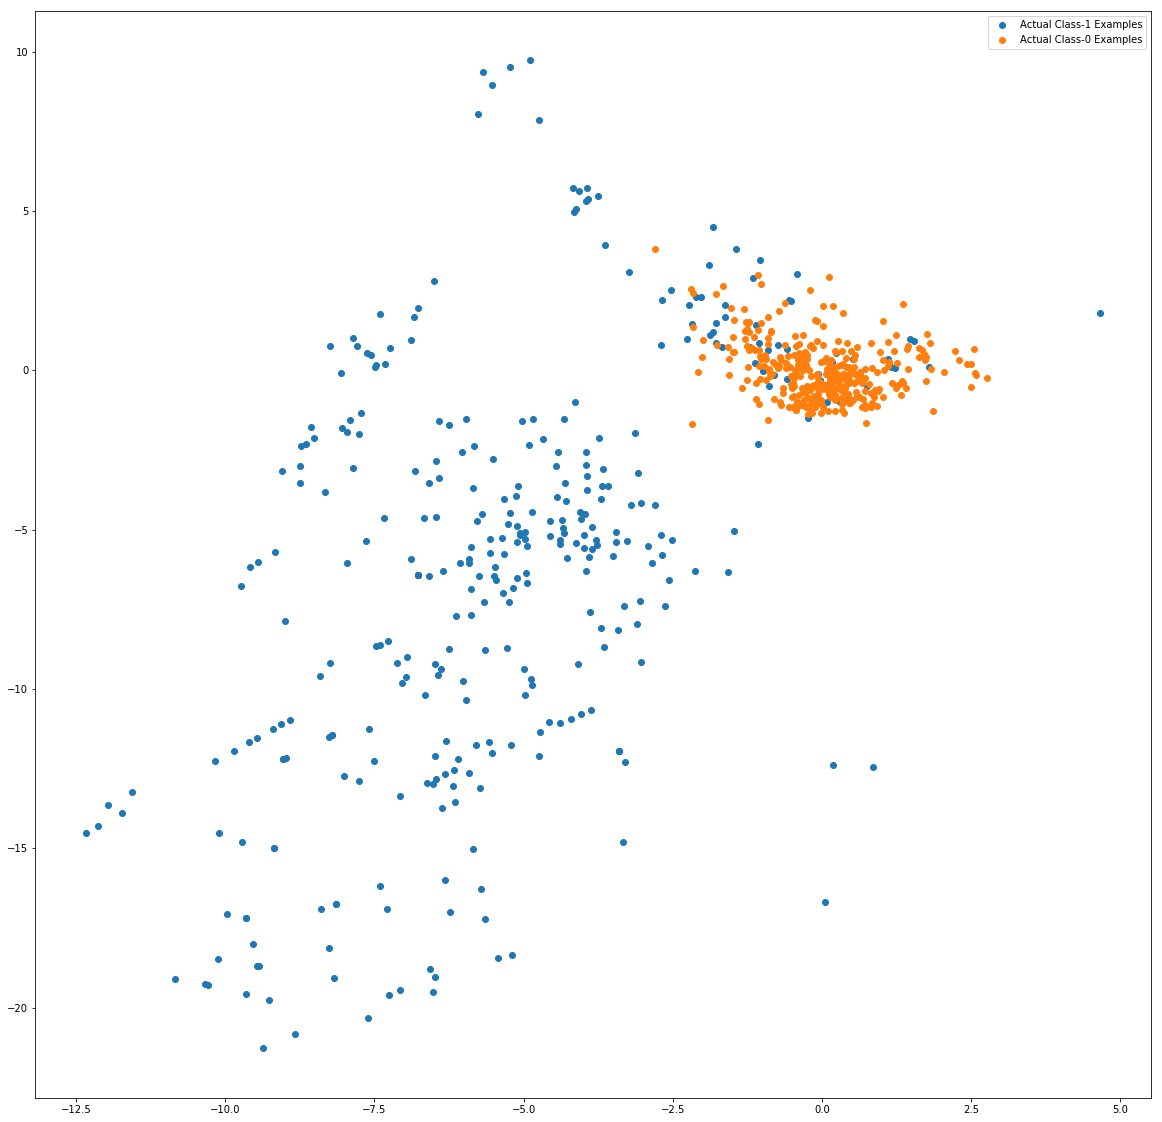

In [17]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## 3. Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

Lets First create train and test dataset using each of the above oversampling techniques.

In [34]:
#Random Oversampling

from imblearn.over_sampling import RandomOverSampler
#Creating oversampled Train and test datasets
print('Before Random Oversampling, Shape of X_train: ', X_train.shape)
print('Before Random Oversampling, Count of label 0: ', y_train.shape[0] - y_train.sum())
print('Before Random Oversampling, Count of label 1: ', y_train.sum())


ros = RandomOverSampler(random_state = 42)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

print('After Random Oversampling, Shape of X_train: ', X_train_ros.shape)
print('After Random Oversampling, Count of label 0: ', y_train_ros.shape[0] - y_train_ros.sum())
print('After Random Oversampling, Count of label 1: ', y_train_ros.sum())

Before Random Oversampling, Shape of X_train:  (199364, 29)
Before Random Oversampling, Count of label 0:  199020
Before Random Oversampling, Count of label 1:  344
After Random Oversampling, Shape of X_train:  (398040, 29)
After Random Oversampling, Count of label 0:  199020
After Random Oversampling, Count of label 1:  199020


# 3.A. Model Experimentation on Random Oversampled Datasets

# 3.A.a: Logistic Regression|

In [168]:
##Perform Cross Validation
lr_bal = LogisticRegression()
scores_ros = cross_val_score(lr_bal, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
print(scores_ros)

#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Logistic Regression with Random Oversampling: ROC_AUC score: ',np.mean(scores_ros))

[0.9884286  0.98851461 0.98836125 0.98844634 0.98799218]
Logistic Regression with Random Oversampling: ROC_AUC score:  0.9883485982631346


In [170]:
#Hyper Parameter Tuning
#Define a cross-validation Method
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 100)

#specify range of hyperparameters to tune
hyper_params = [{"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}]
lr = LogisticRegression()
model_cv_lr = GridSearchCV(lr, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_lr.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_lr.best_estimator_
print('{} algorithm best parameter are : {}'.format('Logistic Regression',best_param))

Logistic Regression algorithm best parameter are : LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [41]:
#Generate Final Logistic Regression Model with Tuned HyperParameters

lr_bal = LogisticRegression(C=100, penalty = 'l2', random_state=42)
#Model Fit
lr_bal.fit(X_train_ros, y_train_ros)

#Model Prediction
y_pred = lr_bal.predict(X_test)

#Model Evaluation
evaluate_model(y_test,y_pred)

Accuracy Score :  0.9741816181547932
Sensitivity:  0.8918918918918919
Specificity:  0.974324403540653
false postive rate:  0.025675596459346972
positive predictive value:  0.056847545219638244
Negative predictive value:  0.9998075095342934
Recall Score :  0.8918918918918919
ROC AUC Score :  0.9331081477162725


In [42]:
#Model Prediction with '.predict_proba' method
y_pred = lr_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9784618723888318


# 3.A.b: Decision Tree

In [44]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc,X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset:  0.9998115767259572


In [45]:
#Perform Hyper Parameter Tuning 

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 15, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   56.6s finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Criterion : Gini

In [46]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.4min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best max_depth = 9

In [47]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.1min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best min_samples_leaf = 1

In [48]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.8min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best min_samples_split = 4

In [43]:
#Creating Final Decision Tree Model with Tuned HyperParameters

#Model Creation
dt_final_bal = DecisionTreeClassifier(criterion='gini',max_depth = 9, min_samples_leaf =1, min_samples_split=4)

#Model Fit
dt_final_bal.fit(X_train_ros, y_train_ros)
y_pred=dt_final_bal.predict(X_test)
print('Evaluation Results of Decision Tree on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Decision Tree on balanced Dataset:
Accuracy Score :  0.9953770349823859
Sensitivity:  0.8175675675675675
Specificity:  0.9956855618734979
false postive rate:  0.00431443812650214
positive predictive value:  0.2474437627811861
Negative predictive value:  0.999682180944982
Recall Score :  0.8175675675675675
ROC AUC Score :  0.9066265647205327


In [44]:
#Model Prediction with '.predict_proba' method
y_pred = dt_final_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9109756995990069


# 3.A.c: Random Forest

In [50]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Random Forest ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

Random Forest ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  1.0


In [51]:
#Perform Hyper Parameter Tuning

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.0min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Best Criterion:entropy

In [52]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 20, 5),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy')
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 24.1min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Best max_depth = 17

In [49]:
#n_estimators
# Create the parameter grid 
param_grid = {
    'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 12.9min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.7min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Best n_estimators = 900

In [37]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.5min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_leaf = 3

In [38]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17,min_samples_leaf=3)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.5min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_split = 6

In [39]:
#max_features
# Create the parameter grid 
param_grid = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17,min_samples_leaf=3,min_samples_split=6)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_ros,y_train_ros)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 47.8min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Max Features = 4

In [45]:
#Final Random Forest Model with Best Parameters

rfc_bal = RandomForestClassifier(bootstrap=True, criterion= 'entropy',
                             max_depth=17,
                             min_samples_leaf=3,
                             min_samples_split=6,
                             max_features=4,
                             n_estimators=900)
#Model Fit
rfc_bal.fit(X_train_ros,y_train_ros)

#Model Predict
y_pred=rfc_bal.predict(X_test)
print('Evaluation Results of Random Forest on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Random Forest on balanced Dataset:
Accuracy Score :  0.9994850368081645
Sensitivity:  0.7972972972972973
Specificity:  0.9998358637669266
false postive rate:  0.00016413623307345098
positive predictive value:  0.8939393939393939
Negative predictive value:  0.9996483454654148
Recall Score :  0.7972972972972973
ROC AUC Score :  0.898566580532112


In [46]:
#Model Prediction with '.predict_proba' method
y_pred = rfc_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9703890947633254


# 3.A.d: SVM

In [58]:
svc = SVC(C = 1)
scores = cross_val_score(svc, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9988340669754109


In [38]:
#HyperParameter Tuning with SVM
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10]}

svc_tuned = SVC()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = svc_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit( X_train_ros, y_train_ros) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('SVC',best_param))

#Model Results
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 96.5min remaining: 84.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 119.3min finished


SVC algorithm best parameter are : SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5583.830509,792.671842,169.923714,42.531850,0.1,{'C': 0.1},0.996043,0.996277,0.996056,0.996191,0.995938,0.996101,0.000119,3,0.996135,0.996165,0.996134,0.996080,0.996092,0.996121,0.000031
1,5561.824343,1295.723432,93.132197,25.558090,1,{'C': 1},0.998774,0.998849,0.998748,0.998957,0.998841,0.998834,0.000073,2,0.998859,0.998886,0.998887,0.998838,0.998821,0.998858,0.000026
2,785.748755,32.187327,57.360259,5.862537,10,{'C': 10},0.999592,0.999571,0.999513,0.999577,0.999567,0.999564,0.000027,1,0.999584,0.999593,0.999629,0.999622,0.999596,0.999605,0.000018


In [ ]:
#Creating Final SVC Model

svc_bal = SVC(C = 10,kernel='linear')
#Model Fit
svc_bal.fit( X_train_ros, y_train_ros)

#Model Predict
y_pred=svc_bal.predict(X_test)
print('Evaluation Results of SVM on balanced Dataset:')
evaluate_model(y_test,y_pred)

In [ ]:
#Model Prediction with '.predict_proba' method
y_pred = svc_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

Note: Couldn't Fit SVC model as it is taking more time to run 

# 3.A.e: KNN

In [40]:
knnc = KNeighborsClassifier()  #n_neighbors=5, metric='euclidean'
scores = cross_val_score(knnc, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('KNN ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

KNN ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9998844337252537


In [41]:
params = {"n_neighbors" : [3,5]}
#Model Creation
knn_tuned = KNeighborsClassifier()
model_knn = GridSearchCV(knn_tuned, param_grid=params, n_jobs=-1,
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                       return_train_score=True)

#Model Fit
model_knn.fit( X_train_ros, y_train_ros)

#The best hyper parameters set
print("Best Hyper Parameters for KNN:\n",model_knn.best_params_)

#Model Results
cv_results = pd.DataFrame(model_knn.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 33.4min finished


Best Hyper Parameters for KNN:
 {'n_neighbors': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.025377,0.133037,351.247594,4.420858,3,{'n_neighbors': 3},0.999925,0.999887,0.999837,0.999874,0.9999,0.999884,0.000029,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,8.021179,0.167457,420.290027,5.466407,5,{'n_neighbors': 5},0.999925,0.999887,0.999837,0.999874,0.9999,0.999884,0.000029,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [34]:
#Final KNN Model

knn_bal = KNeighborsClassifier(n_neighbors = 3)
#Model Fit
knn_bal.fit( X_train_ros, y_train_ros)

#Model Predict
y_pred=knn_bal.predict(X_test)
print('Evaluation Results of KNN on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of KNN on balanced Dataset:
Accuracy Score :  0.9992392589211521
Sensitivity:  0.8243243243243243
Specificity:  0.999542763350724
false postive rate:  0.00045723664927604197
positive predictive value:  0.7577639751552795
Negative predictive value:  0.9996951291010999
Recall Score :  0.8243243243243243
ROC AUC Score :  0.9119335438375241


In [35]:
#Model Prediction with '.predict_proba' method
y_pred = knn_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9187494751918224


# 3.A.f: XGBoost

In [43]:
xgbc = XGBClassifier()  
scores = cross_val_score(xgbc, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9999950065591724


In [44]:
#HyperParameter Tuning with XGBoost
# specify range of parameters learning_rate as a list
params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 


#Model Fit
model_cv.fit(X_train_ros, y_train_ros) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.7min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [45]:
#HyperParameter Tuning with XGBoost
# max_depth
params = {"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_ros,y_train_ros) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 18.5min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [46]:
#HyperParameter Tuning with XGBoost
# min_child_weight
params = {"min_child_weight": [ 1, 3, 5, 7 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_ros,y_train_ros) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  8.7min remaining:   57.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.7min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [47]:
#HyperParameter Tuning with XGBoost
# gamma
params = {"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_ros,y_train_ros) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.6min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [36]:
#Final XGBOOST Model

xgb_bal = XGBClassifier(learning_rate=0.25,max_depth=8,min_child_weight=5,gamma=0.1)
#Model Fit
xgb_bal.fit(X_train_ros,y_train_ros)

#Model Predict
y_pred=xgb_bal.predict(X_test)
print('Evaluation Results of XGBOOST on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of XGBOOST on balanced Dataset:
Accuracy Score :  0.9994616293903538
Sensitivity:  0.831081081081081
Specificity:  0.9997537956503898
false postive rate:  0.00024620434961017645
positive predictive value:  0.8541666666666666
Negative predictive value:  0.9997069133284094
Recall Score :  0.831081081081081
ROC AUC Score :  0.9154174383657354


In [37]:
#Model Prediction with '.predict_proba' method
y_pred = xgb_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9683867436226894


# Summary of All Models trained on Balanced Dataset with Random Oversampling

**Evaluation Metric: ROC_AUC**

        S.No.   Algorithm                   Result after HyperParameter Tuning
                                            Default Threshold          .predict_proba metod
        1.      Logistic Regression           0.93                      0.9784618723888318
        2.      Decision Tree                 0.90                      0.9109756995990069
        3.      Random Forest                 0.898                     0.9703890947633254
      
        4.      KNN                           0.911                     0.9187494751918224
        5.      XGBoost                       0.915                     0.9683867436226894

# 3.B. Model Experimentation on SMOTE's Oversampled Datasets

In [ ]:
#SMOTE - Oversampling Technique
#Creating oversampled Train and test datasets
print('Before SMOTE, Shape of X_train: ', X_train.shape)
print('Before SMOTE, Count of label 0: ', y_train.shape[0] - y_train.sum())
print('Before SMOTE, Count of label 1: ', y_train.sum())

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

print('After SMOTE, Shape of X_train: ', X_train_smote.shape)
print('After SMOTE, Count of label 0: ', y_train_smote.shape[0] - y_train_smote.sum())
print('After SMOTE, Count of label 1: ', y_train_smote.sum())


# Print the class distribution after applying SMOTE 

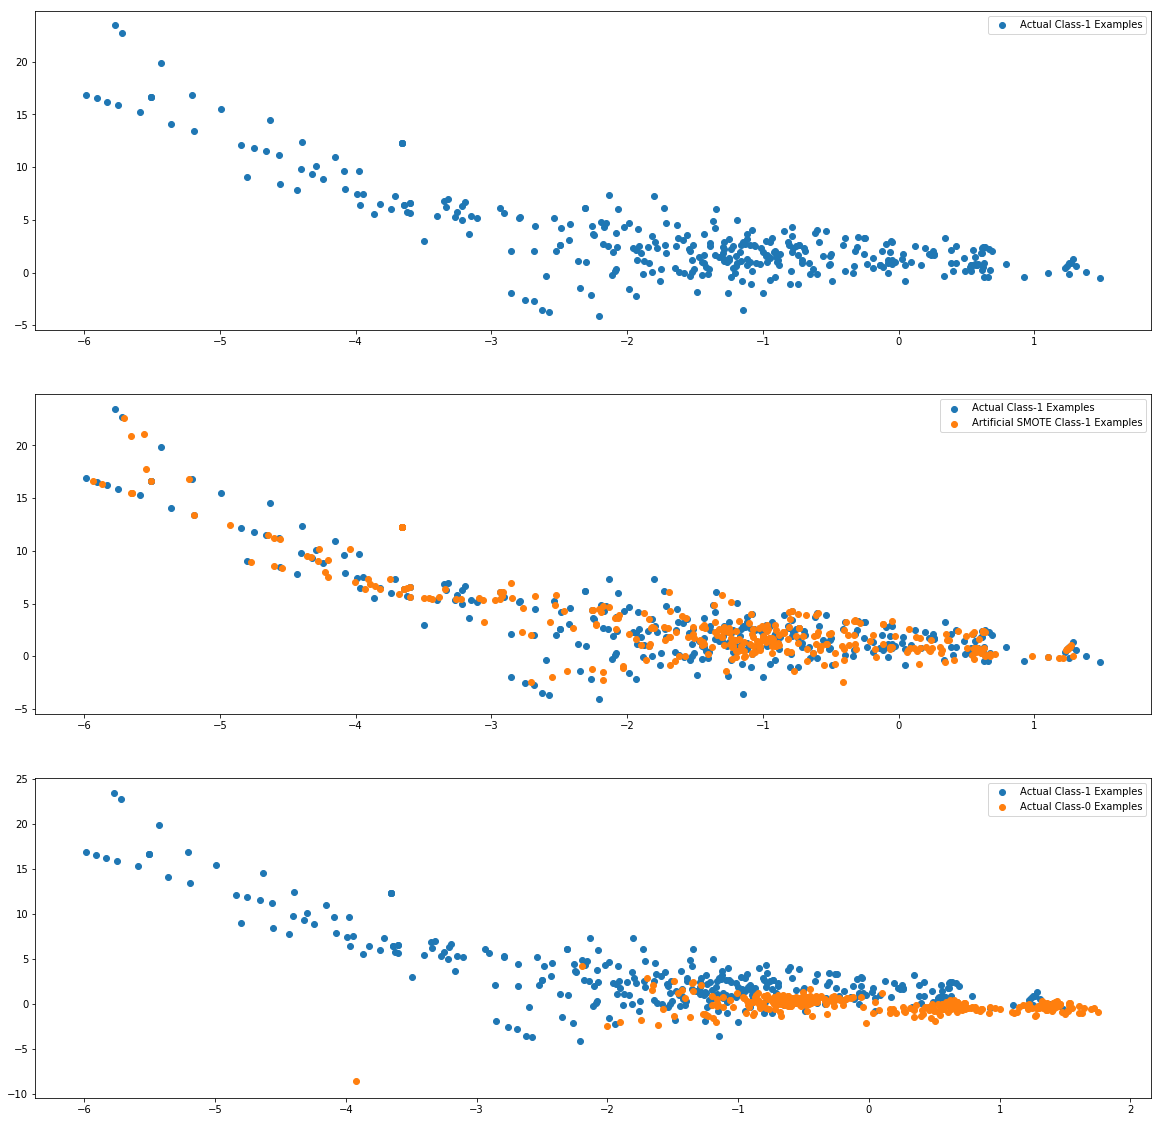

In [161]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# 3.B.a Logistic Regression

In [44]:
##Perform Cross Validation
lr_bal = LogisticRegression()
scores_smote = cross_val_score(lr_bal, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
print(scores_smote)

#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Logistic Regression with SMOTE: ROC_AUC score: ',np.mean(scores_smote))

[0.99009196 0.99042206 0.99088927 0.99029962 0.990929  ]
Logistic Regression with SMOTE: ROC_AUC score:  0.9905263803641763


In [45]:
#Hyper Parameter Tuning

#Define a cross-validation Method
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 100)

#specify range of hyperparameters to tune
hyper_params = [{"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
lr = LogisticRegression()
model_cv_lr = GridSearchCV(lr, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_lr.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_lr.best_estimator_
print('{} algorithm best parameter are : {}'.format('Logistic Regression',best_param))

Logistic Regression algorithm best parameter are : LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [49]:
#Generate Final Logistic Regression Model with Tuned HyperParameters

lr_bal = LogisticRegression(C=100, penalty = 'l2', random_state=42)
#Model Fit
lr_bal.fit(X_train_smote, y_train_smote)

#Model Prediction
y_pred = lr_bal.predict(X_test)

#Model Evaluation
evaluate_model(y_test,y_pred)

Accuracy Score :  0.973210210315649
Sensitivity:  0.8918918918918919
Specificity:  0.9733513101588604
false postive rate:  0.026648689841139574
positive predictive value:  0.05488565488565489
Negative predictive value:  0.9998073171319155
Recall Score :  0.8918918918918919
ROC AUC Score :  0.9326216010253762


In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr, tpr, thresholds

(array([0.        , 0.02664869, 1.        ]),
 array([0.        , 0.89189189, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [51]:
#Model Prediction with '.predict_proba' method
y_pred = lr_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9770212442350317


# 3.B.b: Decision Tree

In [47]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc,X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset:  0.9982363581549591


In [44]:
#Perform Hyper Parameter Tuning 

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 15, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Criterion = entropy

In [45]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.1min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


max_depth = 9

In [46]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 19.2min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


min_samples_leaf = 1

In [47]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 18.2min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


min_samples_split = 4

In [52]:
#Creating Final Decision Tree Model with Tuned HyperParameters

#Model Creation
dt_final_bal = DecisionTreeClassifier(criterion='entropy',max_depth = 9, min_samples_leaf =1, min_samples_split=4)

#Model Fit
dt_final_bal.fit(X_train_smote, y_train_smote)
y_pred=dt_final_bal.predict(X_test)
print('Evaluation Results of Decision Tree on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Decision Tree on balanced Dataset:
Accuracy Score :  0.9821869550460541
Sensitivity:  0.8378378378378378
Specificity:  0.9824374230611408
false postive rate:  0.017562576938859254
positive predictive value:  0.07644882860665844
Negative predictive value:  0.9997136755705611
Recall Score :  0.8378378378378378
ROC AUC Score :  0.9101376304494893


In [53]:
#Model Prediction with '.predict_proba' method
y_pred = dt_final_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9155956354971538


# 3.B.c: Random Forest

In [49]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc,X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Random Forest ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

Random Forest ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9999965853054805


In [50]:
#Perform Hyper Parameter Tuning

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 542.8min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Best Criterion : Entropy

In [52]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 20, 5),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy')
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

C:\Users\vasudes2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 136.3min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


max_depth = 17

In [52]:
#n_estimators
# Create the parameter grid 
param_grid = {
    'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 25.3min remaining: 22.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 42.3min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


n_estimators=900

In [50]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 87.9min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_leaf=1

In [42]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(1, 20, 5)
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17,min_samples_leaf=1)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.3min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_split=6

In [43]:
#max_features
# Create the parameter grid 
param_grid = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17,min_samples_split=6,min_samples_leaf=1)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 118.4min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


max_features = 8

In [54]:
#Final Random Forest Model with Best Parameters

rfc_bal = RandomForestClassifier(bootstrap=True, criterion= 'entropy',
                             max_depth=17,
                             min_samples_leaf=1,
                             min_samples_split=6,
                             max_features=8,
                             n_estimators=900)
#Model Fit
rfc_bal.fit(X_train_smote, y_train_smote)

#Model Predict
y_pred=rfc_bal.predict(X_test)
print('Evaluation Results of Random Forest on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Random Forest on balanced Dataset:
Accuracy Score :  0.9992860737567735
Sensitivity:  0.831081081081081
Specificity:  0.9995779354006683
false postive rate:  0.00042206459933173104
positive predictive value:  0.7735849056603774
Negative predictive value:  0.9997068617794662
Recall Score :  0.831081081081081
ROC AUC Score :  0.9153295082408747


In [55]:
#Model Prediction with '.predict_proba' method
y_pred = rfc_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9791061387901764


# 3.B.d: SVM

In [41]:
svc = SVC(C = 1)
scores = cross_val_score(svc, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9993020652468324


In [37]:
#HyperParameter Tuning with SVM
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10]}

svc_tuned = SVC()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = svc_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit( X_train_smote, y_train_smote) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('SVC',best_param))

#Model Results
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 40.2min remaining: 35.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 57.4min finished


SVC algorithm best parameter are : SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2541.641828,226.751834,157.639691,26.015700,0.1,{'C': 0.1},0.996268,0.996382,0.996567,0.996297,0.996805,0.996464,0.000200,3,0.996474,0.996512,0.996502,0.996493,0.996430,0.996482,0.000029
1,1559.350136,31.157759,173.764493,1.367508,1,{'C': 1},0.999279,0.999270,0.999253,0.999285,0.999423,0.999302,0.000062,2,0.999315,0.999327,0.999332,0.999310,0.999302,0.999317,0.000011
2,747.144081,95.475845,57.697453,12.924499,10,{'C': 10},0.999873,0.999892,0.999807,0.999879,0.999858,0.999862,0.000030,1,0.999872,0.999868,0.999884,0.999871,0.999878,0.999874,0.000006


In [ ]:
#Creating Final SVC Model

svc_bal = SVC(C = 10)
#Model Fit
svc_bal.fit( X_train_smote, y_train_smote)

#Model Predict
y_pred=svc_bal.predict(X_test)
print('Evaluation Results of SVM on balanced Dataset:')
evaluate_model(y_test,y_pred)

In [ ]:
#Model Prediction with '.predict_proba' method
y_pred = svc_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

Note: Couldn't Fit SVC model as it is taking more time to run 

# 3.B.e: KNN

In [40]:
knnc = KNeighborsClassifier()  #n_neighbors=5, metric='euclidean'
scores = cross_val_score(knnc, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('KNN ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

KNN ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9996633504170435


In [41]:
params = {"n_neighbors" : [3,5]}
#Model Creation
knn_tuned = KNeighborsClassifier()
model_knn = GridSearchCV(knn_tuned, param_grid=params, n_jobs=-1,
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                       return_train_score=True)

#Model Fit
model_knn.fit( X_train_smote, y_train_smote)

#The best hyper parameters set
print("Best Hyper Parameters for KNN:\n",model_knn.best_params_)

#Model Results
cv_results = pd.DataFrame(model_knn.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 34.4min finished


Best Hyper Parameters for KNN:
 {'n_neighbors': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.586358,0.087322,365.167600,6.673195,3,{'n_neighbors': 3},0.999749,0.999686,0.999548,0.999648,0.999673,0.999661,0.000066,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,7.573738,0.316480,435.648771,8.363452,5,{'n_neighbors': 5},0.999749,0.999699,0.999548,0.999648,0.999673,0.999663,0.000067,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [56]:
#Final KNN Model

knn_bal = KNeighborsClassifier(n_neighbors = 5)
#Model Fit
knn_bal.fit(X_train_smote, y_train_smote)

#Model Predict
y_pred=knn_bal.predict(X_test)
print('Evaluation Results of KNN on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of KNN on balanced Dataset:
Accuracy Score :  0.9980103694860901
Sensitivity:  0.8581081081081081
Specificity:  0.9982531215194326
false postive rate:  0.0017468784805674425
positive predictive value:  0.4601449275362319
Negative predictive value:  0.9997534256226003
Recall Score :  0.8581081081081081
ROC AUC Score :  0.9281806148137703


In [57]:
#Model Prediction with '.predict_proba' method
y_pred = knn_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9319669572849713


# 3.B.f: XGBoost

In [55]:
xgbc = XGBClassifier()  
scores = cross_val_score(xgbc, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('XGBoost ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

XGBoost ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9999913727223199


In [56]:
#HyperParameter Tuning with XGBoost
# specify range of parameters learning_rate as a list
params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 


#Model Fit
model_cv.fit(X_train_smote, y_train_smote) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.0min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [57]:
#HyperParameter Tuning with XGBoost
# max_depth
params = {"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_smote, y_train_smote) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 25.0min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [58]:
#HyperParameter Tuning with XGBoost
# min_child_weight
params = {"min_child_weight": [ 1, 3, 5, 7 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_smote, y_train_smote) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 10.9min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.9min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [60]:
#HyperParameter Tuning with XGBoost
# gamma
params = {"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_smote, y_train_smote) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.3min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [58]:
#Final XGBOOST Model

xgb_bal = XGBClassifier(learning_rate=0.25,max_depth=8,min_child_weight=5,gamma=0.1)
#Model Fit
xgb_bal.fit(X_train_smote, y_train_smote)

#Model Predict
y_pred=xgb_bal.predict(X_test)
print('Evaluation Results of XGBOOST on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of XGBOOST on balanced Dataset:
Accuracy Score :  0.9992158515033414
Sensitivity:  0.831081081081081
Specificity:  0.9995075913007796
false postive rate:  0.0004924086992203529
positive predictive value:  0.7454545454545455
Negative predictive value:  0.9997068411548113
Recall Score :  0.831081081081081
ROC AUC Score :  0.9152943361909304


In [59]:
#Model Prediction with '.predict_proba' method
y_pred = xgb_bal.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9744027484897406


# Summary of All Models trained on Balanced Dataset with SMOTE Technique

**Evaluation Metric: ROC_AUC**

        S.No.   Algorithm                   Result after HyperParameter Tuning
                                            Default Threshold          .predict_proba metod
        1.      Logistic Regression           0.93                     0.9770212442350317                     
        2.      Decision Tree                 0.91                     0.9155956354971538
        3.      Random Forest                 0.915                    0.9791061387901764 
        4.      KNN                           0.928                    0.9319669572849713
        5.      XGBoost                       0.915                    0.9744027484897406

# 3.C. Model Experimentation on ADASYN's Oversampled Datasets

In [15]:
#ADASYN - Oversampling Technique
#Creating oversampled Train and test datasets
print('Before ADASYN, Shape of X_train: ', X_train.shape)
print('Before ADASYN, Count of label 0: ', y_train.shape[0] - y_train.sum())
print('Before ADASYN, Count of label 1: ', y_train.sum())

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 42)
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train)

print('After ADASYN, Shape of X_train: ', X_train_adasyn.shape)
print('After ADASYN, Count of label 0: ', y_train_adasyn.shape[0] - y_train_adasyn.sum())
print('After ADASYN, Count of label 1: ', y_train_adasyn.sum())


Before ADASYN, Shape of X_train:  (199364, 29)
Before ADASYN, Count of label 0:  199020
Before ADASYN, Count of label 1:  344


Using TensorFlow backend.


After ADASYN, Shape of X_train:  (397996, 29)
After ADASYN, Count of label 0:  199020
After ADASYN, Count of label 1:  198976


# Print the class distribution after applying ADASYN

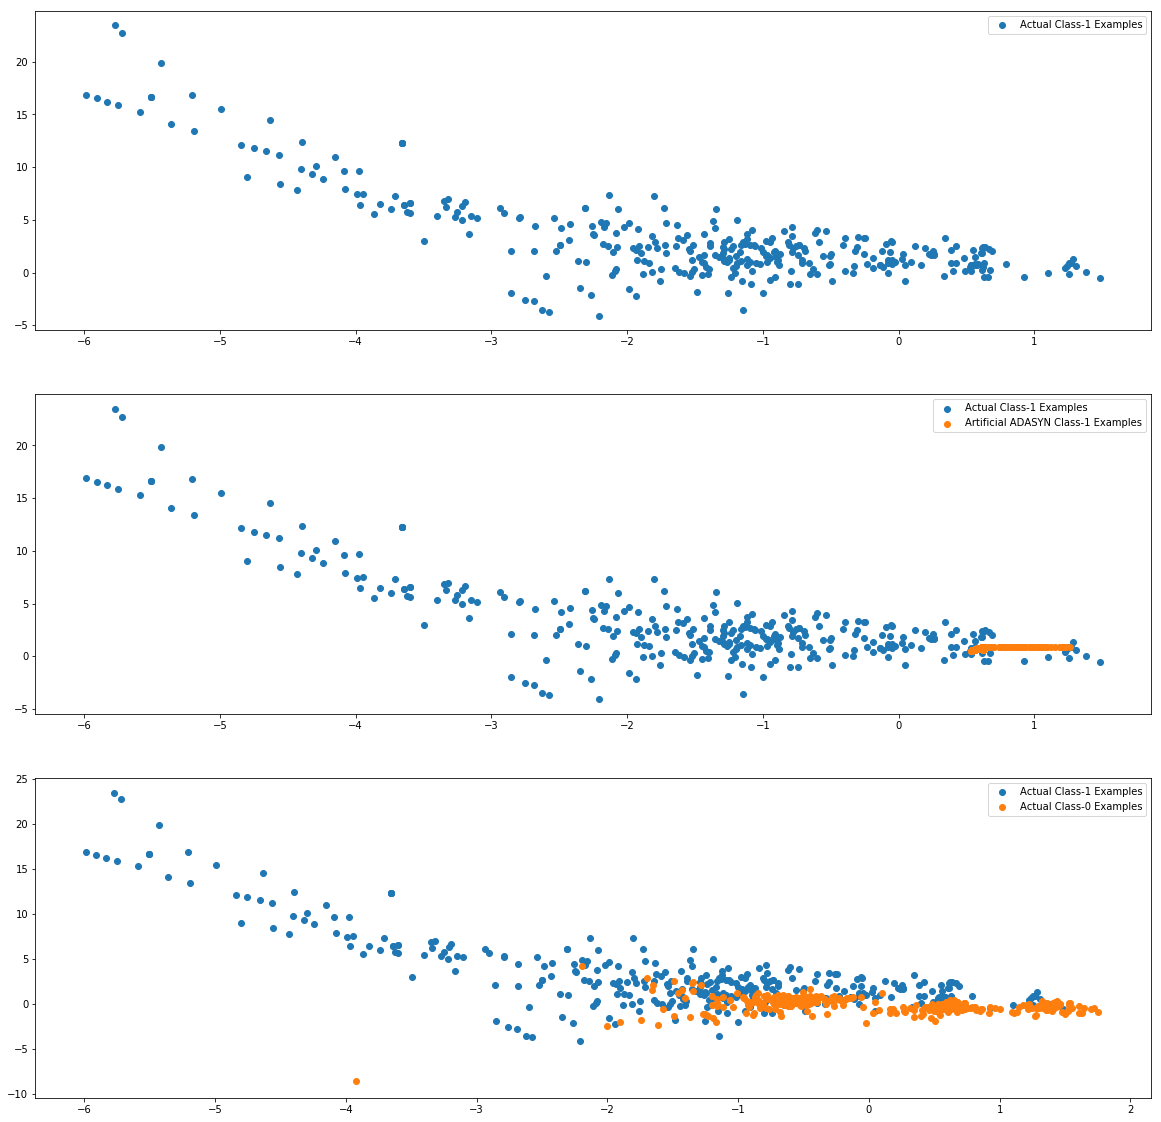

In [162]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# 3.C.a Logistic Regression

In [62]:
##Perform Cross Validation
lr_bal = LogisticRegression()
scores_adasyn = cross_val_score(lr_bal, X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Logistic Regression with ADASYN: ROC_AUC score: ',np.mean(scores_adasyn))

Logistic Regression with ADASYN: ROC_AUC score:  0.9669443739720572


In [63]:
#Hyper Parameter Tuning

#Define a cross-validation Method
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 100)

#specify range of hyperparameters to tune
hyper_params = [{"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
lr = LogisticRegression()
model_cv_lr = GridSearchCV(lr, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_lr.fit(X_train_adasyn, y_train_adasyn)  
# get the best parameter
best_param = model_cv_lr.best_estimator_
print('{} algorithm best parameter are : {}'.format('Logistic Regression',best_param))

Logistic Regression algorithm best parameter are : LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
#Generate Final Logistic Regression Model with Tuned HyperParameters

lr3_adasyn = LogisticRegression(C=100, penalty = 'l2', solver='lbfgs', random_state=42)
#Model Fit
lr3_adasyn.fit(X_train_adasyn, y_train_adasyn)

#Model Prediction
y_pred = lr3_adasyn.predict(X_test)

#Model Evaluation
print('Evaluation Results of Logistic Regression on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Logistic Regression on balanced Dataset:
Accuracy Score :  0.9119295904872254
Sensitivity:  0.9324324324324325
Specificity:  0.9118940148895012
false postive rate:  0.08810598511049886
positive predictive value:  0.01803214425715406
Negative predictive value:  0.9998714487723358
Recall Score :  0.9324324324324325
ROC AUC Score :  0.9221632236609668


In [65]:
#Model Prediction with '.predict_proba' method
y_pred = lr3_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9768102515435301


# 3.C.b: Decision Tree

In [58]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc,X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset: ',np.mean(scores))

Decision Tree ROC_AUC score with Stratified KFold cross valitaion over Balanced Train Dataset:  0.9986005794521701


In [59]:
#Perform Hyper Parameter Tuning 

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 15, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.7min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Criterion : entropy

In [60]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 31.8min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


max_depth = 9

In [61]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 1),
    #'min_samples_split': range(1, 20, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 36.5min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


min_samples_leaf = 1

In [62]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 31.9min finished


Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


min_samples_split = 3

In [66]:
#Creating Final Decision Tree Model with Tuned HyperParameters

#Model Creation
dt_final_bal_adasyn = DecisionTreeClassifier(criterion='entropy',max_depth = 9, min_samples_leaf =1, min_samples_split=3)

#Model Fit
dt_final_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred=dt_final_bal_adasyn.predict(X_test)
print('Evaluation Results of Decision Tree on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Decision Tree on balanced Dataset:
Accuracy Score :  0.95512798005688
Sensitivity:  0.8783783783783784
Specificity:  0.9552611524708365
false postive rate:  0.04473884752916349
positive predictive value:  0.03294475418144957
Negative predictive value:  0.9997791329742199
Recall Score :  0.8783783783783784
ROC AUC Score :  0.9168197654246075


In [67]:
#Model Prediction with '.predict_proba' method
y_pred = dt_final_bal_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9310363238553637


# 3.C.c: Random Forest

In [45]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('Random Forest ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

Random Forest ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9999945598498121


In [47]:
#Perform Hyper Parameter Tuning

#Criterion
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 92.9min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Best Criterion : entropy

In [49]:
#max_depth
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 20, 5),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy')
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit( X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

C:\Users\vasudes2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 135.5min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


max_depth = 17

In [70]:
#n_estimators
# Create the parameter grid 
param_grid = {
    'n_estimators': range(100, 1000, 400)
    #'max_depth': range(2, 10, 1),
    #'min_samples_leaf': range(1, 10, 2),
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=17)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit( X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 27.3min remaining: 23.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 45.7min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


n_estimators=100

In [47]:
#min_samples_leaf
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(1, 10, 2)
    #'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy',max_depth=17)
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit( X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 78.3min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_leaf = 1

In [39]:
#min_samples_split
# Create the parameter grid 
param_grid = {
    #'max_depth': range(2, 20, 5),
    #'min_samples_leaf': range(1, 10, 2)
    'min_samples_split': range(1, 20, 5),
    #'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy',max_depth=17,min_samples_leaf=1)
grid_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit( X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 94.7min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


min_samples_split=6

In [40]:
#max_features
# Create the parameter grid 
param_grid = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the grid search model
dtree = RandomForestClassifier(random_state =42, criterion = 'entropy', max_depth=12,min_samples_leaf=1,min_samples_split=6)
grid_search_rf = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, refit='roc_auc',
                          cv = kfolds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit( X_train_adasyn, y_train_adasyn)

# get the best parameter
best_param = grid_search_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 93.9min finished


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


max_features = 4

In [68]:
#Final Random Forest Model with Best Parameters

rfc_bal_adasyn = RandomForestClassifier(bootstrap=True, criterion= 'entropy',
                             max_depth=12,
                             min_samples_leaf=1,
                             min_samples_split=6,
                             max_features=4,
                             n_estimators=100)
#Model Fit
rfc_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#Model Predict
y_pred=rfc_bal_adasyn.predict(X_test)
print('Evaluation Results of Random Forest on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of Random Forest on balanced Dataset:
Accuracy Score :  0.9956813314139251
Sensitivity:  0.8445945945945946
Specificity:  0.9959434902397561
false postive rate:  0.00405650976024386
positive predictive value:  0.2653927813163482
Negative predictive value:  0.999729322600386
Recall Score :  0.8445945945945946
ROC AUC Score :  0.9202690424171754


In [69]:
#Model Prediction with '.predict_proba' method
y_pred = rfc_bal_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.984072685734565


# 3.C.d: SVM

In [63]:
svc = SVC(C = 1)
scores = cross_val_score(svc,X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset: ',np.mean(scores))

SVM ROC_AUC score with Stratified KFold cross valitaion over balanced Train Dataset:  0.9994992661627441


In [64]:
#HyperParameter Tuning with SVM
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10]}

svc_tuned = SVC()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = svc_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_adasyn, y_train_adasyn) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('SVC',best_param))

#Model Results
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 40.9min remaining: 35.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 72.4min finished


SVC algorithm best parameter are : SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3281.273871,292.932495,174.281635,10.867850,0.1,{'C': 0.1},0.997873,0.997824,0.997647,0.997757,0.997957,0.997811,0.000105,3,0.997831,0.997824,0.997896,0.997871,0.997781,0.997840,0.000040
1,1657.987015,189.961733,117.717607,1.392446,1,{'C': 1},0.999534,0.999631,0.999330,0.999476,0.999525,0.999499,0.000098,2,0.999521,0.999523,0.999583,0.999537,0.999548,0.999542,0.000023
2,1080.576199,185.493452,18.646118,2.877719,10,{'C': 10},0.999882,0.999959,0.999809,0.999898,0.999894,0.999888,0.000048,1,0.999927,0.999915,0.999925,0.999923,0.999916,0.999921,0.000005


In [ ]:
#Creating Final SVC Model

svc_bal_adasyn = SVC(C = 10,kernel='linear')
#Model Fit
svc_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#Model Predict
y_pred=svc_bal_adasyn.predict(X_test)
print('Evaluation Results of SVM on balanced Dataset:')
evaluate_model(y_test,y_pred)

In [ ]:
#Model Prediction with '.predict_proba' method
y_pred = svc_bal_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

Note: Couldn't Fit SVC model as it is taking more time to run 

# 3.C.e: KNN

In [66]:
knnc = KNeighborsClassifier()  #n_neighbors=5, metric='euclidean'
scores = cross_val_score(knnc, X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('KNN ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

KNN ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9996583257964022


In [67]:
params = {"n_neighbors" : [3,5]}
#Model Creation
knn_tuned = KNeighborsClassifier()
model_knn = GridSearchCV(knn_tuned, param_grid=params, n_jobs=-1,
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                       return_train_score=True)

#Model Fit
model_knn.fit(X_train_adasyn, y_train_adasyn)

#The best hyper parameters set
print("Best Hyper Parameters for KNN:\n",model_knn.best_params_)

#Model Results
cv_results = pd.DataFrame(model_knn.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 37.1min finished


Best Hyper Parameters for KNN:
 {'n_neighbors': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.747990,0.234996,389.824680,9.706491,3,{'n_neighbors': 3},0.999749,0.999673,0.999548,0.999648,0.999661,0.999656,0.000064,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,7.669678,0.166449,466.431949,10.723734,5,{'n_neighbors': 5},0.999749,0.999673,0.999548,0.999648,0.999673,0.999658,0.000065,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [88]:
#Final KNN Model

knn_bal_adasyn = KNeighborsClassifier(n_neighbors = 5)
#Model Fit
knn_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#Model Predict
y_pred=knn_bal_adasyn.predict(X_test)
print('Evaluation Results of KNN on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of KNN on balanced Dataset:
Accuracy Score :  0.9980103694860901
Sensitivity:  0.8581081081081081
Specificity:  0.9982531215194326
false postive rate:  0.0017468784805674425
positive predictive value:  0.4601449275362319
Negative predictive value:  0.9997534256226003
Recall Score :  0.8581081081081081
ROC AUC Score :  0.9281806148137703


In [89]:
#Model Prediction with '.predict_proba' method
y_pred = knn_bal_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9319580454479921


# 3.C.f: XGBoost

In [69]:
xgbc = XGBClassifier()  
scores = cross_val_score(xgbc, X_train_adasyn, y_train_adasyn, scoring = 'roc_auc', cv = kfolds)
#As above scores list contain score of all the 5 iterations, we will take average of scores list to calculate score of the algorithm.
print('XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset: ',np.mean(scores))

XGBoost ROC_AUC score with Stratified KFold cross valitaion over Imbalanced Train Dataset:  0.9999854081463398


In [70]:
#HyperParameter Tuning with XGBoost
# specify range of parameters learning_rate as a list
params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 


#Model Fit
model_cv.fit(X_train_adasyn, y_train_adasyn) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.8min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [71]:
#HyperParameter Tuning with XGBoost
# max_depth
params = {"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_adasyn, y_train_adasyn) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 23.0min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [72]:
#HyperParameter Tuning with XGBoost
# min_child_weight
params = {"min_child_weight": [ 1, 3, 5, 7 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_adasyn, y_train_adasyn) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 10.0min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.1min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [73]:
#HyperParameter Tuning with XGBoost
# gamma
params = {"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

xgb_tuned = XGBClassifier()

# set up grid search scheme
# note that we are still using the k stratified fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = xgb_tuned, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True) 

#Model Fit
model_cv.fit(X_train_adasyn, y_train_adasyn) 

#Model's Best Parameteres:
best_param = model_cv.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBOOST',best_param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.5min finished


XGBOOST algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [86]:
#Final XGBOOST Model

xgb_bal_adasyn = XGBClassifier(learning_rate=0.3,max_depth=8,min_child_weight=1,gamma=0.1)
#Model Fit
xgb_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#Model Predict
y_pred=xgb_bal_adasyn.predict(X_test)
print('Evaluation Results of XGBOOST on balanced Dataset:')
evaluate_model(y_test,y_pred)

Evaluation Results of XGBOOST on balanced Dataset:
Accuracy Score :  0.9992743700478681
Sensitivity:  0.8243243243243243
Specificity:  0.9995779354006683
false postive rate:  0.00042206459933173104
positive predictive value:  0.7721518987341772
Negative predictive value:  0.9996951398252917
Recall Score :  0.8243243243243243
ROC AUC Score :  0.9119511298624964


In [87]:
#Model Prediction with '.predict_proba' method
y_pred = xgb_bal_adasyn.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred,y_test)

ROC_AUC Score:  0.9786855793010901


# Summary of All Models trained on Balanced Dataset with ADASYN Technique

**Evaluation Metric: ROC_AUC**

        S.No.   Algorithm                   Result after HyperParameter Tuning
                                            Default Threshold          .predict_proba metod
        1.      Logistic Regression           0.922                      0.9768102515435301
        2.      Decision Tree                 0.913                      0.9310363238553637
        3.      Random Forest                 0.923                      0.984072685734565
        4.      KNN                           0.880                      0.9319580454479921
        5.      XGBoost                       0.911                      0.9786855793010901

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [16]:
# perform the best oversampling method on X_train_adasysn & y_train_adasyn

clf = RandomForestClassifier(bootstrap=True, criterion= 'entropy',
                             max_depth=12,
                             min_samples_leaf=1,
                             min_samples_split=6,
                             max_features=4,
                             n_estimators=100)
#Model Fit
clf.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#Model Prediction
y_pred = clf.predict_proba(X_test)
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_2 = y_test.reset_index(drop=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_2,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Class_prob'})

#print the evaluation score on the X_test by choosing the best evaluation metric
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Class,y_pred_final.Class_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.9801116712585732


In [18]:
#Model Prediction with '.predict_proba' method
y_pred_prob = clf.predict_proba(X_test)
evaluate_model_nondefault_prob(y_pred_prob,y_test)

ROC_AUC Score:  0.9801116712585732


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 17


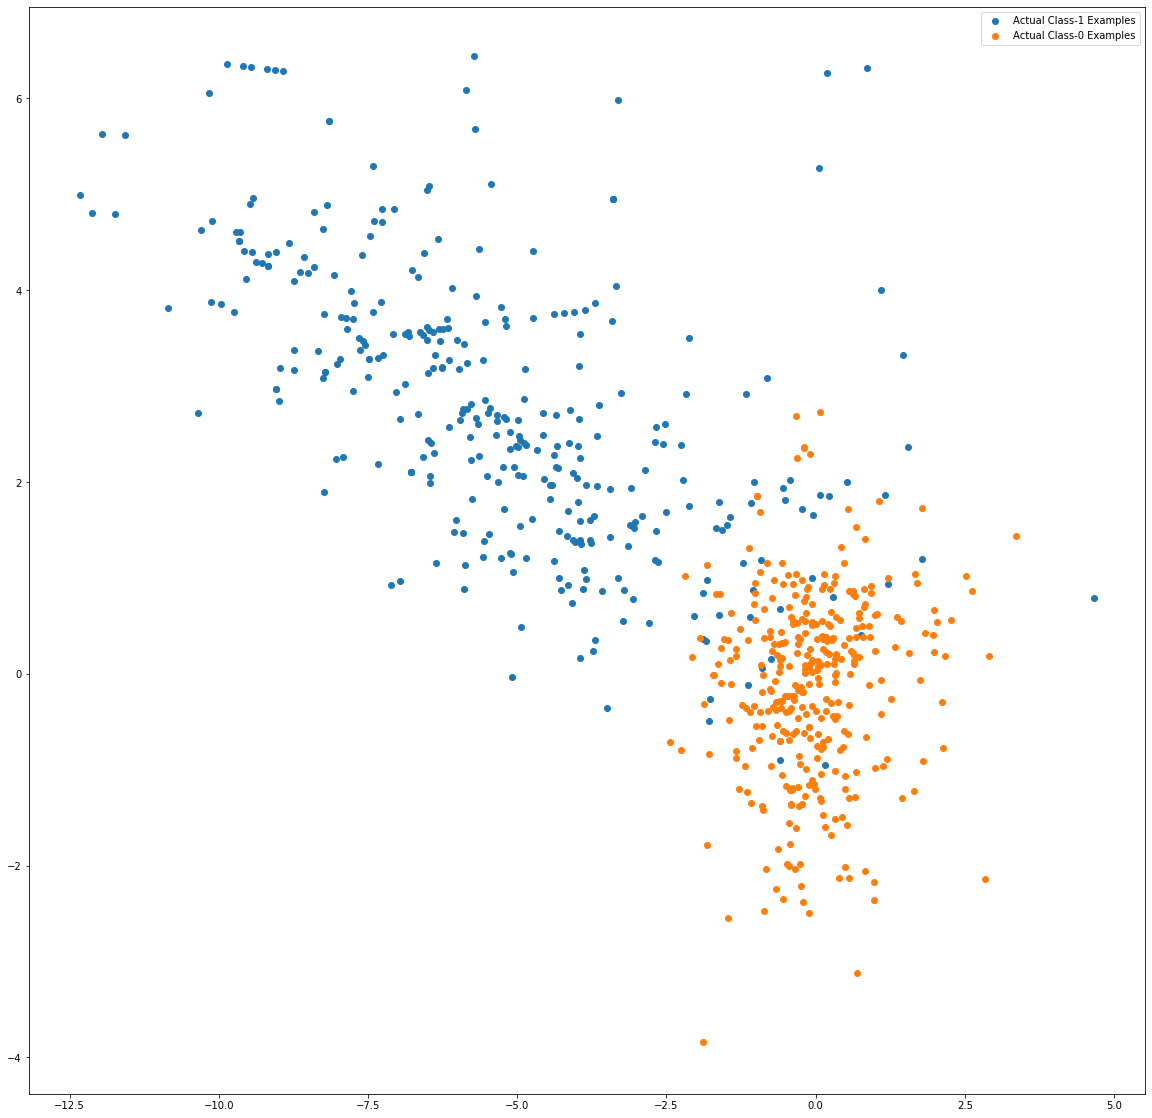

In [80]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [81]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [35]:
train_pred = clf.predict_proba(X_train)
train_pred_df = pd.DataFrame(train_pred)
# Converting to column dataframe
train_pred_1 = train_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
train_pred_1.reset_index(drop=True, inplace=True)
y_train_1 = y_train.reset_index(drop=True)

# Appending y_test_df and y_pred_1
train_pred_final = pd.concat([y_train_1,train_pred_1],axis=1)

# Renaming the column 
train_pred_final= train_pred_final.rename(columns={ 1 : 'Class_prob'})

#print the evaluation score on the X_test by choosing the best evaluation metric
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(train_pred_final.Class,train_pred_final.Class_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score for train dataset: ',roc_auc)

ROC_AUC Score for train dataset:  0.9999904765911104


In [36]:
#Print Threshold
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.6847086722672558
